###Import Necessary Libraries

In [43]:
import numpy as numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#configure visualization
sns.set_theme(style="whitegrid")

In [45]:
# Load the dataset

file_path = 'data/medicalmalpractice.csv'
df = pd.read_csv(file_path)

# display first few rows
df.head()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


In [50]:
# Understanding the data

# Basic overview
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns.tolist())

# data types and non-null values
print("Dataset info:")
df.info()

# Summary statistics
print("Summary Statistics")
df.describe(include='all').T

# check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Sample rows
df.sample(5)

Shape of the dataset: (79210, 8)
Columns in the dataset: ['Amount', 'Severity', 'Age', 'Private Attorney', 'Marital Status', 'Specialty', 'Insurance', 'Gender']
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB
Summary Statistics
Duplicate rows: 1


,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
62962,146059,3,56,0,2,OBGYN,Unknown,Female
70235,103564,4,29,1,2,Emergency Medicine,Unknown,Male
45081,153258,3,31,1,2,Orthopedic Surgery,Unknown,Male
66500,380405,5,20,1,2,Family Practice,Private,Female
32648,65513,5,33,0,1,OBGYN,Private,Female


In [29]:
# Handle missing data

#check for missing values
print("Missing values by column:")
print(df.isnull().sum())

# Visualize missing values
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap")
# plt.show()

# Fill numeric columns with median, categorical with mode
# for col in df.select_dtypes(include='number').columns:
#     df[col].fillna(df[col].median(), inplace=True)
# for col in df.select_dtypes(include='object').columns:
#     df[col].fillna(df[col].mode()[0], inplace=True)

Missing values by column:
Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64


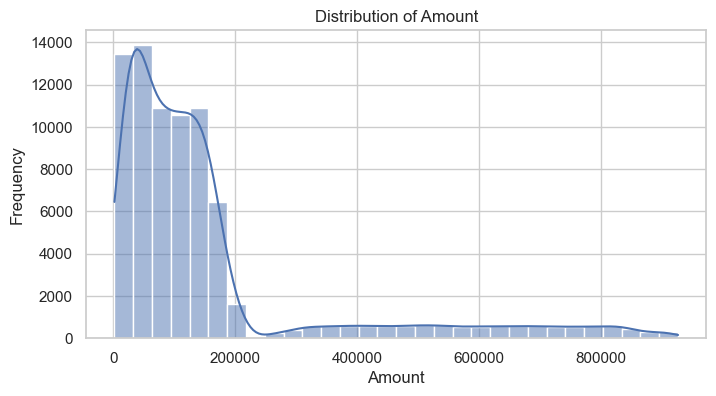

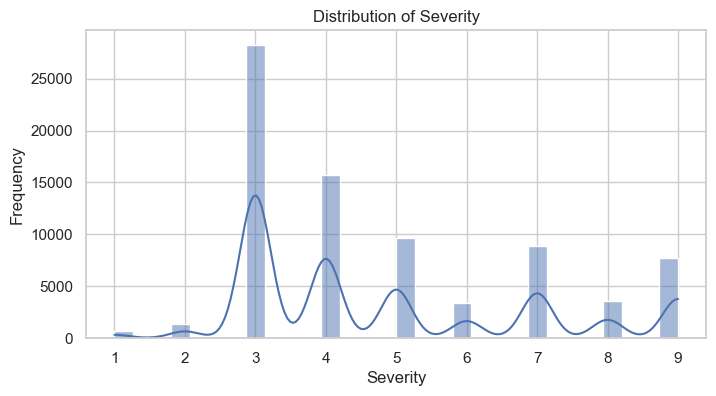

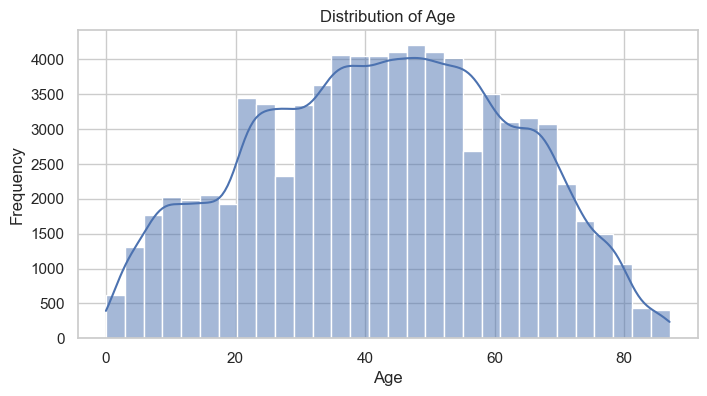

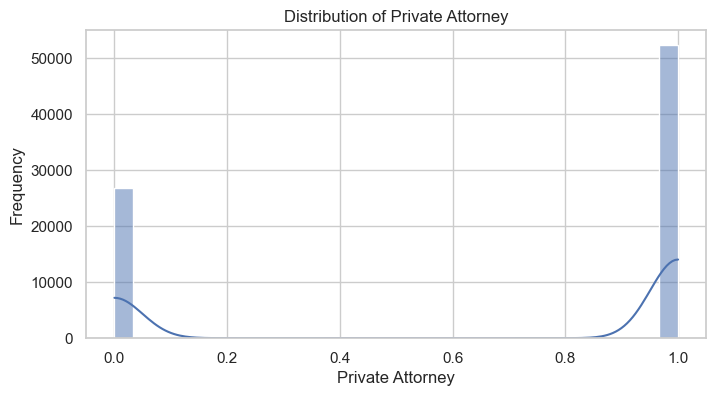

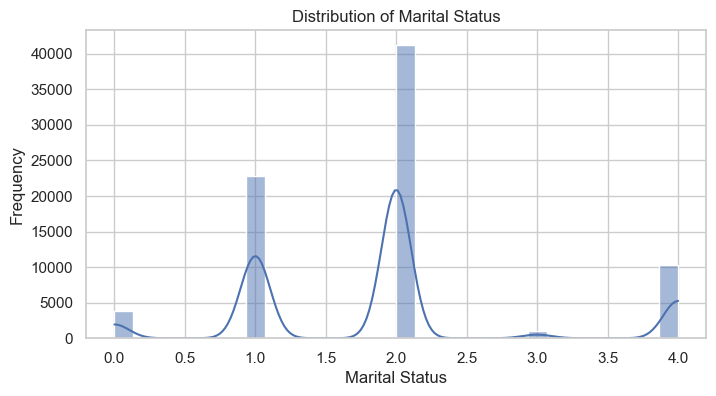

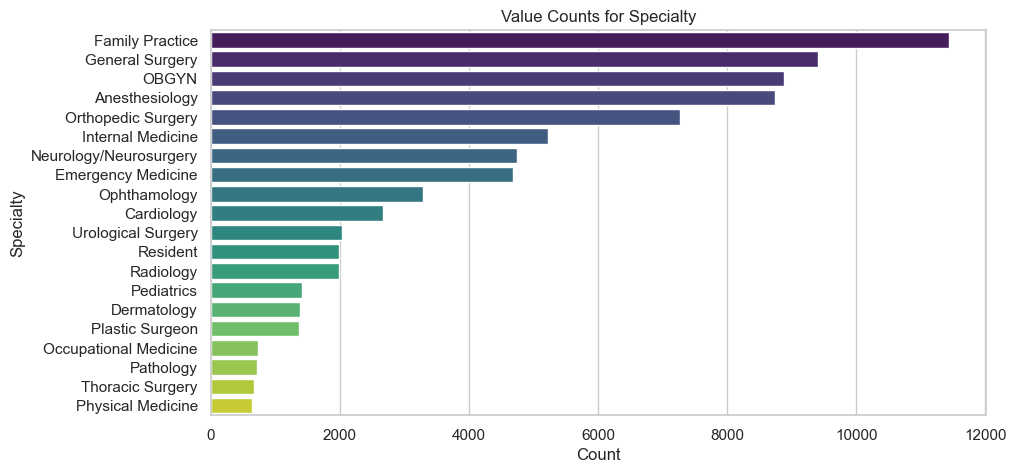

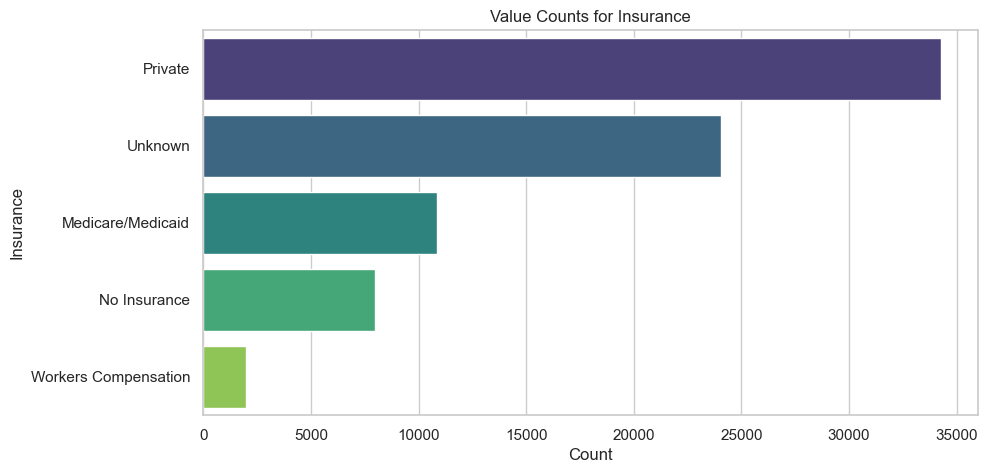

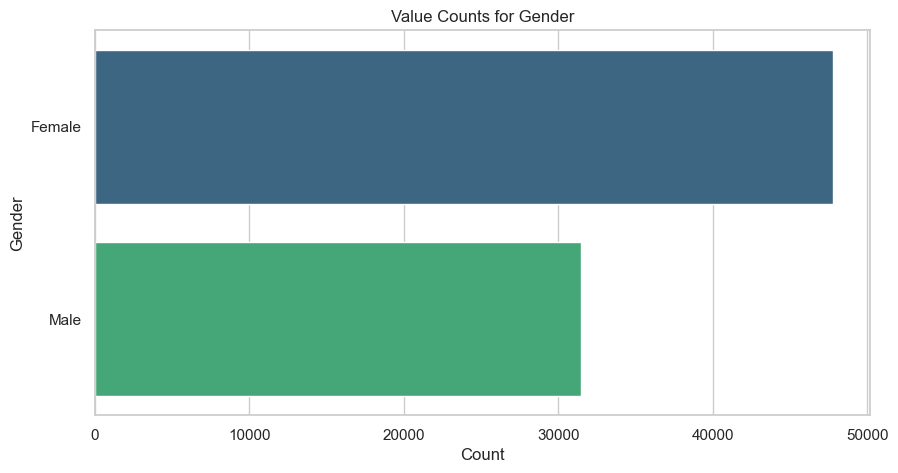

In [51]:
# Univariate Analysis

# plot distributions for numerical columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plot for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Value Counts for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

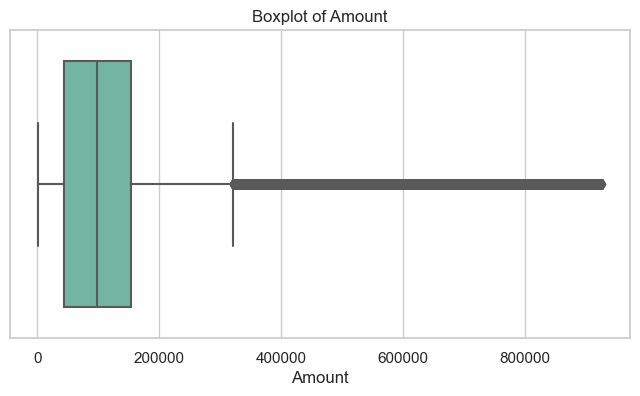

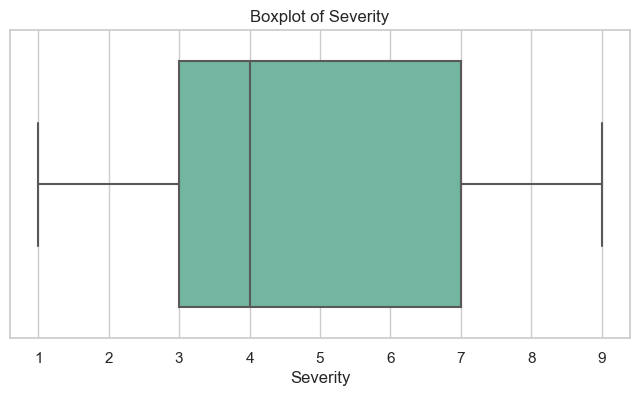

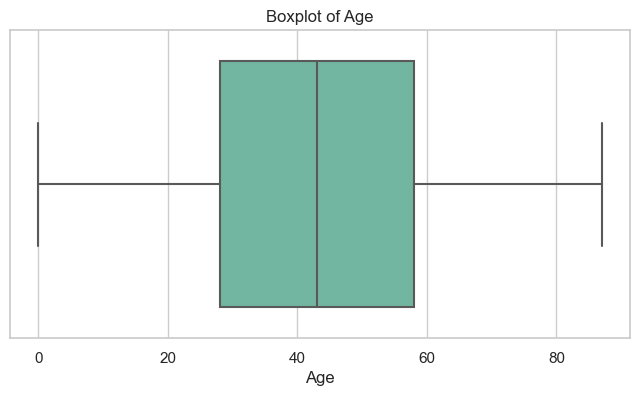

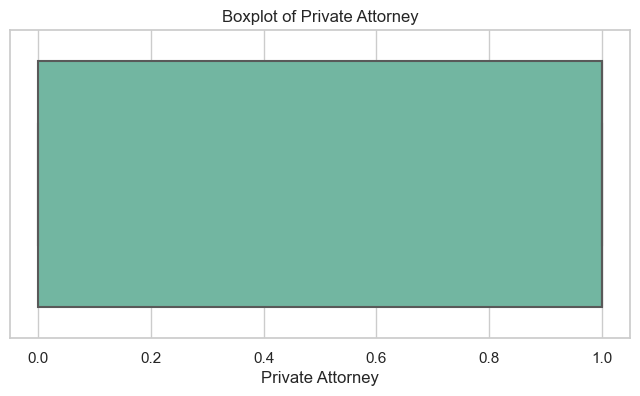

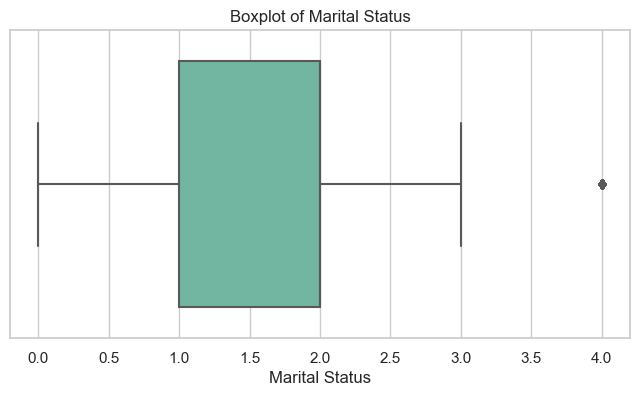

In [52]:
# Outlier Analysis

# Boxplots for numerical features
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

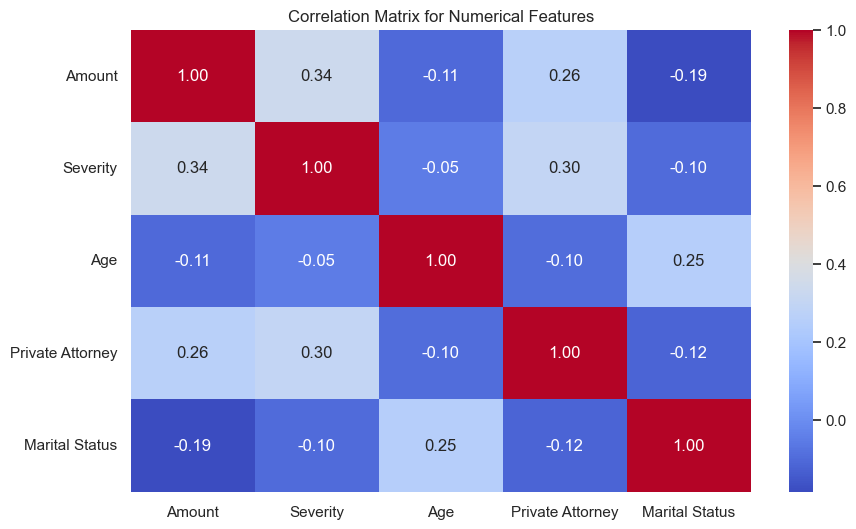

In [54]:
# Correlation Analysis

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# # Pairplot for numeric columns
# sns.pairplot(df[numeric_cols], diag_kind='kde')
# plt.show()

# # Boxplots to analyze distribution across categorical features
# for col in categorical_cols:
#     sns.boxplot(x=col, y = numeric_cols[0], data=df)
#     plt.title(f"{numeric_cols[0]} distribution across {col}")
#     plt.show()


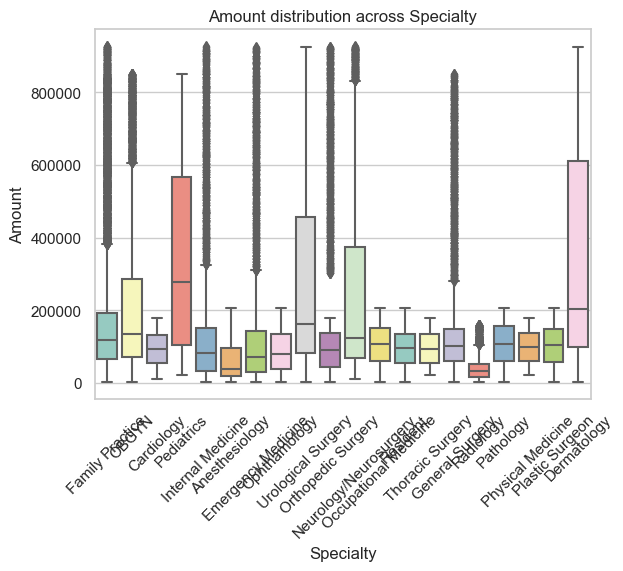

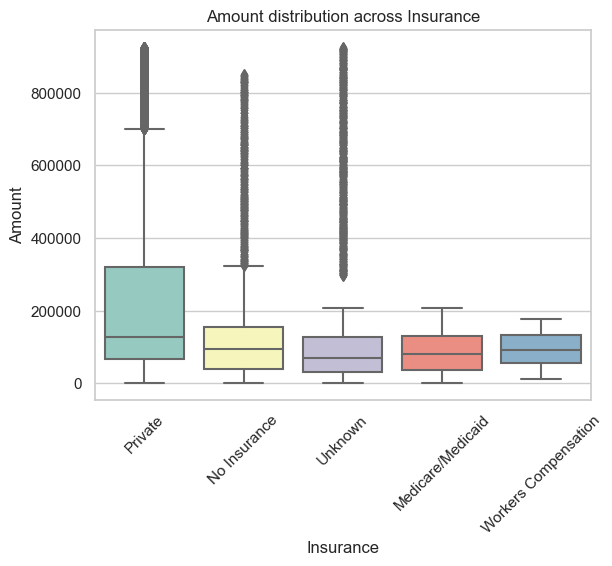

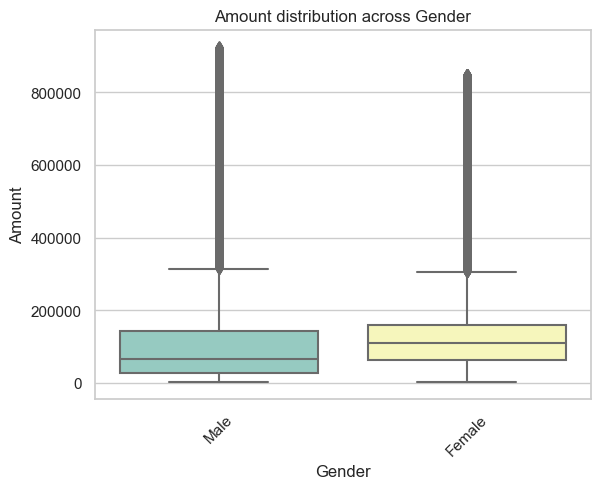

In [59]:
# Investigating Relationships
# Bivariate Analysis

# Boxplots to analyze distribution across categorical features
for col in categorical_cols:
    sns.boxplot(x=col, y = numeric_cols[0], data=df, palette="Set3")
    plt.title(f"{numeric_cols[0]} distribution across {col}")
    plt.xticks(rotation=45)
    plt.show()

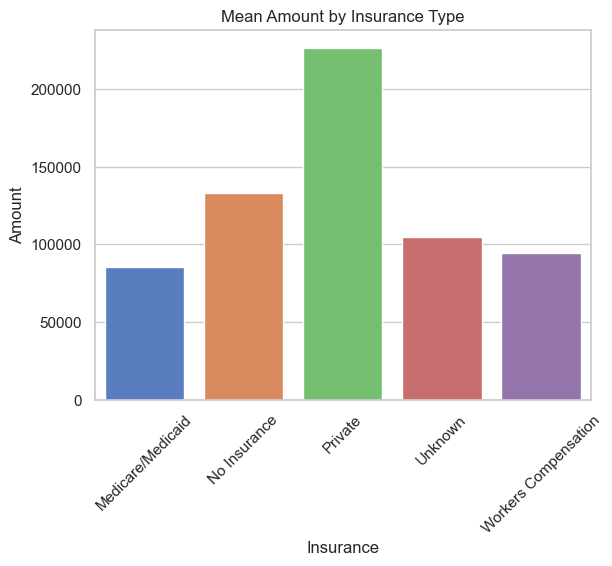

In [60]:
# Bar plot for Amount by Insurance
grouped = df.groupby('Insurance')['Amount'].mean().reset_index()
sns.barplot(x='Insurance', y='Amount', data=grouped, palette="muted")
plt.title('Mean Amount by Insurance Type')
plt.xticks(rotation=45)
plt.show()

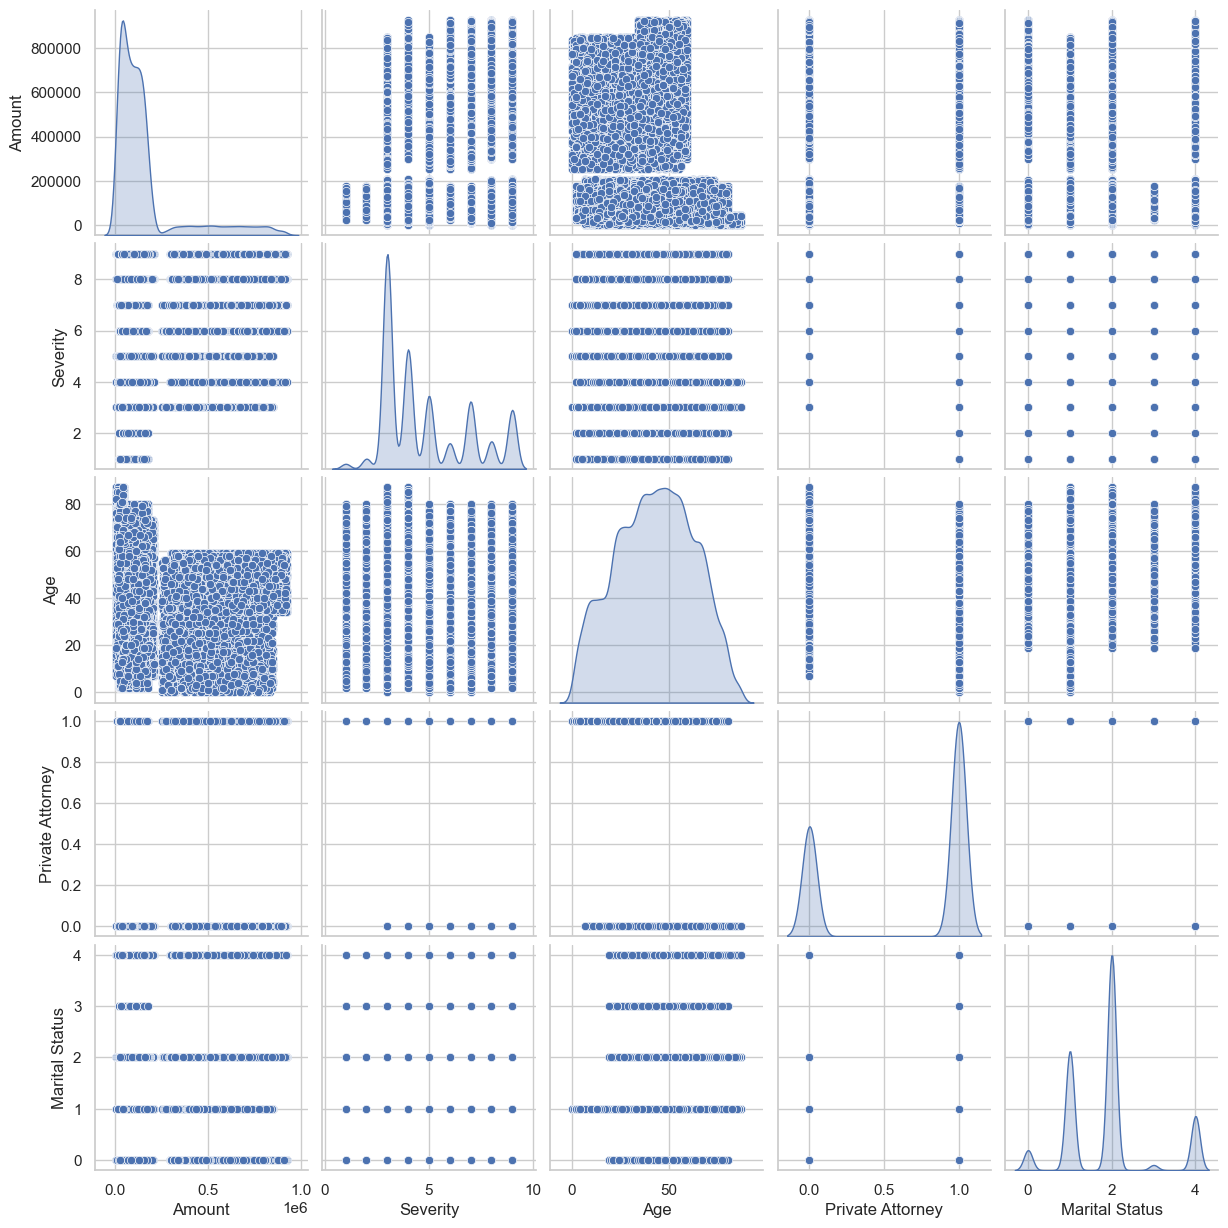

In [57]:
# Pairplot for numeric columns
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()

In [64]:
# Data Quality Checks

# Investigate rows where Age is 0
age_zero_rows = df[df['Age'] == 0]
print("Rows where Age is 0:")
print(age_zero_rows)

Rows where Age is 0:
       Amount  Severity  Age  Private Attorney  Marital Status  \
1794   520865         7    0                 1               1   
3008   566500         7    0                 1               1   
3374   501872         5    0                 1               1   
3474   321342         7    0                 1               1   
4505   702058         7    0                 1               1   
...       ...       ...  ...               ...             ...   
72427  540328         5    0                 1               1   
75090  770489         5    0                 1               1   
75280  314705         7    0                 1               1   
75496  460326         5    0                 1               1   
77173  675283         3    0                 1               1   

             Specialty     Insurance  Gender  
1794        Pediatrics       Private  Female  
3008   Family Practice       Private  Female  
3374             OBGYN  No Insurance  Female 

In [65]:
# Additional insights
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
Specialty: ['Family Practice' 'OBGYN' 'Cardiology' 'Pediatrics' 'Internal Medicine'
 'Anesthesiology' 'Emergency Medicine' 'Ophthamology' 'Urological Surgery'
 'Orthopedic Surgery' 'Neurology/Neurosurgery' 'Occupational Medicine'
 'Resident' 'Thoracic Surgery' 'General Surgery' 'Radiology' 'Pathology'
 'Physical Medicine' 'Plastic Surgeon' 'Dermatology']
Insurance: ['Private' 'No Insurance' 'Unknown' 'Medicare/Medicaid'
 'Workers Compensation']
Gender: ['Male' 'Female']


In [67]:
#Final Data Insights

#summary of key statistics

summary = {
    'Feature': df.columns,
    'Missing Values': df.isnull().sum().values,
    'Unique Values': df.nunique().values,
    'Data Type': df.dtypes.values,
}

summary_df = pd.DataFrame(summary)
print(summary_df)

# Save cleaned dataset
df.to_csv('data/cleaned_data.csv', index=False)

            Feature  Missing Values  Unique Values Data Type
0            Amount               0          67695     int64
1          Severity               0              9     int64
2               Age               0             88     int64
3  Private Attorney               0              2     int64
4    Marital Status               0              5     int64
5         Specialty               0             20    object
6         Insurance               0              5    object
7            Gender               0              2    object
